# <center>Laboratorium 12<br>Metody Numeryczne</center>    


Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

In [1]:
import main
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań różniczkowych
zwyczajnych. Będziemy rozpatrywać równania różniczkowe postaci
$$\dot{x}(t) = f(x(t), t)$$
gdzie:

$x(t) \in \mathbb{R}^n$,

$t \ge 0$ 


z warunkiem początkowym $x(0) = x0$

Jest to tak zwany problem początkowy (problem Cauchy’ego) dla równań różniczkowych zwyczajnych.

**Zadanie 1.**  
Zaimplementuj metodę *solve_euler* z main.py 


***Zadanie 2.*** 

Rozwiąż równanie 
$
\dot{x}(t)=\frac{x+t}{x-t}
$, 

$x(0)=1$ (równanie to posiada rozwiązanie dokładne: 
$x(t)=t+\sqrt{1+2t^2}$). 

Narysuj wykres podanego rozwiązania dokładnego oraz uzyskanych rozwiązań numerycznych.


Rozwiązanie dokładne

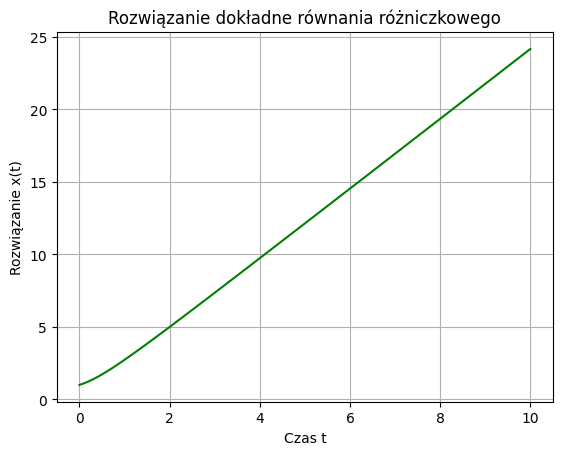

In [7]:
#wizualizacja rozwiązania równania dokładnego, aby było widać, jak powinno wyglądać po rozwiązaniu metodą Eulera
t = np.linspace(0,10,100)
rozw_dkl = lambda t: t + np.sqrt(1 + 2*t**2)

plt.plot(t,rozw_dkl(t),'g')
plt.title("Rozwiązanie dokładne równania różniczkowego")
plt.xlabel("Czas t")
plt.ylabel("Rozwiązanie x(t)")
plt.grid()
plt.show()

Rozwiązanie numeryczne metodą Eulera

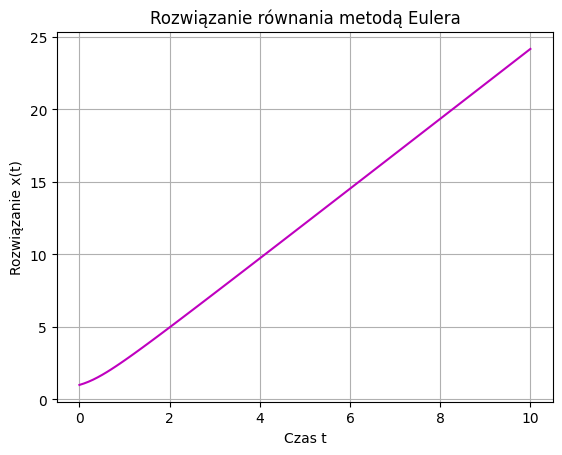

In [8]:
def x_prim(x,t):
    return (x + t)/(x - t)

t = np.linspace(0,10,100) #wektor czasu dla którego ma zostać rozwiązane równanie
x = np.zeros((len(t),1))
x[0] = 1 #warunek początkowy równania

rozw_eul = main.solve_euler(x_prim,t,x)

plt.plot(t,rozw_eul,'m')
plt.title("Rozwiązanie równania metodą Eulera")
plt.xlabel("Czas t")
plt.ylabel("Rozwiązanie x(t)")
plt.grid()
plt.show()

Porównując oba wykresy wynik obliczony numerycznie metodą Eulera jest identyczny z rozwiązaniem dokładnym tego rozwiązania różniczkowego.

***Zadanie 3.*** 

Rozwiąż układ równań różniczkowych: 
$$
\begin{array}{l}
\dot{x_1}(t)={x_3}(t)\\
\dot{x_2}(t)={x_4}(t)\\
\dot{x_3}(t)=-\frac{x_1(t)}{{(x_1(t)^2+x_2(t)^2)}^{\frac{3}{2}}}\\
\dot{x_4}(t)=-\frac{x_2(t)}{{(x_1(t)^2+x_2(t)^2)}^{\frac{3}{2}}}
\end{array}
$$
      
z warunkiem początkowym $x(0)=[1,0,0,1]^T$.
    
Dla takiego warunku początkowego układ ten ma rozwiązanie szczególne 
$$
x(t)=\left[\begin{matrix}
cos(t)\\
sin(t)\\
-sin(t)\\
cos(t)
\end{matrix}\right].
$$  

Narysuj wykres podanego rozwiązania szczegółowego oraz uzyskanych rozwiązań numerycznych.

Rozwiązanie szczegółowe

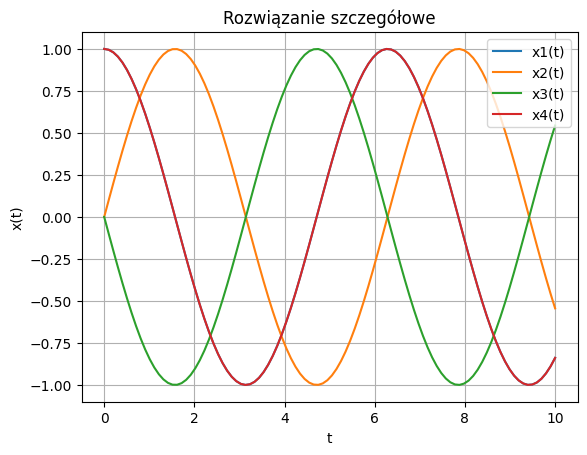

In [28]:
#wizualizacja rozwiązania równania szczegółowego, aby było widać, jak powinno wyglądać po rozwiązaniu metodą Eulera
t = np.linspace(0,10,100) #wektor czasu dla którego ma zostać rozwiązany układ równań

plt.plot(t, np.cos(t))
plt.plot(t, np.sin(t))
plt.plot(t, -np.sin(t))
plt.plot(t, np.cos(t))
plt.title("Rozwiązanie szczegółowe")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.legend(["x1(t)", "x2(t)", "x3(t)", "x4(t)"])
plt.grid()
plt.show()

Rozwiązanie numeryczne

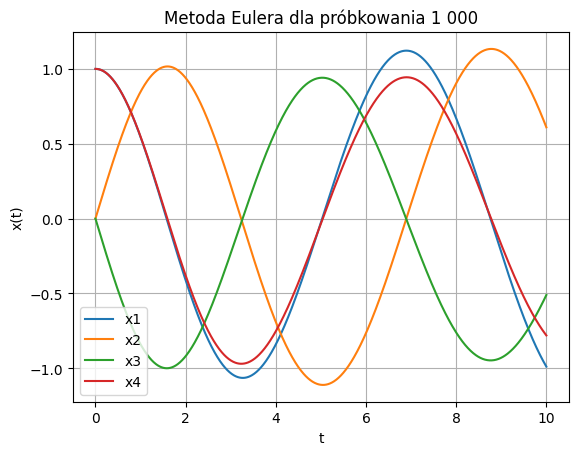

In [47]:
def x_prim(x,t):
    x1 = x[2]
    x2 = x[3]
    x3 = -x[0]/(np.power(np.power(x[0],2)+np.power(x[1],2),3/2))
    x4 = -x[1]/(np.power(np.power(x[0],2)+np.power(x[1],2),3/2))
    return np.array([x1,x2,x3,x4])

t = np.linspace(0,10,1000)
x = np.zeros((len(t),4))
x0 = [1,0,0,1]
for i in range(0,len(x0)):
    x[0][i] = x0[i]

y = main.solve_euler(x_prim,t,x)

plt.plot(t,y)
plt.title("Metoda Eulera dla próbkowania 1 000")
plt.ylabel("x(t)")
plt.xlabel("t")
plt.legend(["x1","x2","x3","x4"])
plt.grid()
plt.show()

Ponieważ dla próbkowania 1000 wynik był niedokładny i nie pokrywał się z rozwiązaniem szczegółowym, zwiększyłam próbkowanie i narysowałam wykres jeszcze raz.

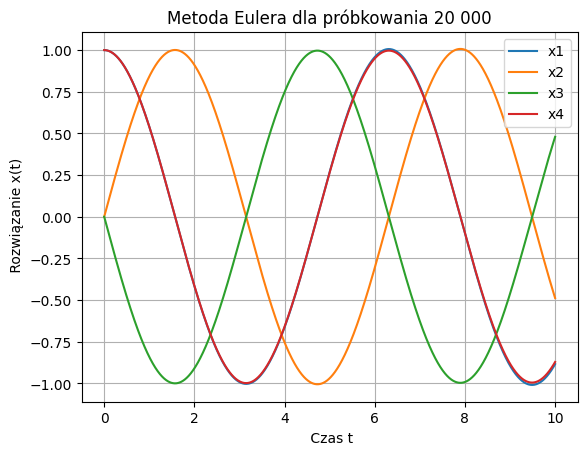

In [46]:
def x_prim(x,t):
    x1 = x[2]
    x2 = x[3]
    x3 = -x[0]/(np.power(np.power(x[0],2)+np.power(x[1],2),3/2))
    x4 = -x[1]/(np.power(np.power(x[0],2)+np.power(x[1],2),3/2))
    return np.array([x1,x2,x3,x4])

t = np.linspace(0,10,20000)
x = np.zeros((len(t),4))
x0 = [1,0,0,1]
for i in range(0,len(x0)):
    x[0][i] = x0[i]

y = main.solve_euler(x_prim,t,x)

plt.plot(t,y)
plt.title("Metoda Eulera dla próbkowania 20 000")
plt.xlabel(" Czas t")
plt.ylabel(" Rozwiązanie x(t)")
plt.legend(["x1","x2","x3","x4"])
plt.grid()
plt.show()

***Zadanie 4.*** 

Rozwiąż układ równań $\dot{x}(t)=\mathbf{A}x(t)$, gdzie macierz 
$
\mathbf{A}$ dana jest wzorem:  
$$
\mathbf{A}=\left[\begin{matrix}
-667 & 333 \\
 666 & -334
\end{matrix}\right]
$$

z warynkiem początkowym $x(0)=[0, 3]^T$

Narysuj wykres uzyskanych rozwiązań numerycznych. Jakie jest rozwiązanie dokładne tego równania?

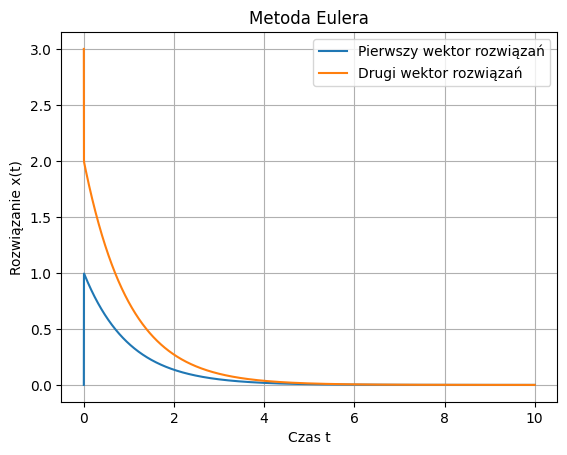

In [48]:
A = np.array([[-667,333], [666,-334]])
def x_prim(x,t):
    return A @ x

t = np.linspace(0,10,20000)
x = np.zeros((len(t),2))
x0 = [0,3]
for i in range(0,len(x0)):
    x[0][i] = x0[i]

y = main.solve_euler(x_prim,t,x)

plt.plot(t,y[:,0], label = "Pierwszy wektor rozwiązań")
plt.plot(t,y[:,1], label = "Drugi wektor rozwiązań")
plt.title("Metoda Eulera")
plt.xlabel("Czas t")
plt.ylabel("Rozwiązanie x(t)")
plt.legend()
plt.grid()
plt.show()

***Zadanie 4.*** 

Orbita Arenstorfa. Jest to przykład z astronomii opisujący zredukowany problem trzech ciał. Rozważa się dwa ciała o masach $\mu$ i $\mu'=1-\mu$, poruszające się w ruchu kołowym na jednej płaszczyźnie oraz ciało o pomijalnej masie poruszające się między nimi w tej samej płaszczyźnie. Dany jest układ równań różniczkowych:
$$
\begin{array}{l}
\dot{x_1}(t)={x_2}(t)\\
\dot{x_2}(t)={x_1}(t)+2x_4(t)-\mu'\frac{x_1+\mu}{D_1}-\mu\frac{x_1-\mu'}{D_2}\\
\dot{x_3}(t)=x_4(t)\\
\dot{x_4}(t)=x_3(t)-2x_2(t)-\mu'\frac{x_3(t)}{D_1}
-\mu\frac{x_3(t)}{D_2}\end{array}.
$$

gdzie
$$
\begin{array}{l}
D_1=((x_1(t)+\mu)^2+{x_3}^2(t))^\frac{3}{2}\\
D_2=((x_1(t)-\mu')^2+{x_3}^2(t))^\frac{3}{2}\\
\mu=0.012277471\end{array}.
$$

Zmienne $x_1$ i $x_3$ odpowiadają za współrzędne na płaszczyźnie trzeciego ciała zaś $x_2$ i $x_4$
są odpowiednio prędkościami. Warto zwrócić uwagę, że zarówno czas jak i masa zostały
w równaniach przeskalowane, i nie mają bezpośredniej interpretacji fizycznej, należy je
traktować jako zmienne bezwymiarowe. Dla pewnych warunków początkowych i czasu
symulacji
$$
\begin{array}{l}
x_1(0) = 0.994\\
x_2(0) = 0\\
x_3(0) = 0\\
x_4(0) = − 2.00158510637908252240537862224\\
T = 17.0652165601579625588917206249.\end{array}
$$
dokładne rozwiązanie tych równań jest okresowe ($x(0)=x(T)$).

Narysuj wykres uzyskanych rozwiązań numerycznych.

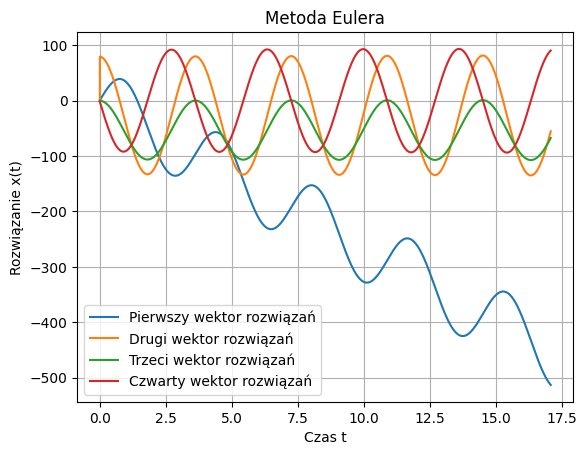

In [50]:
def x_prim(x,t):
    ni = 0.012277471
    ni_prim = 1 - ni
    D1 = np.power(np.power(x[0] + ni,2) + np.power(x[2],2),3/2)
    D2 = np.power(np.power(x[0] - ni_prim,2) + np.power(x[2],2),3/2)
    x1 = x[1]
    x2 = x[0] + 2*x[3] - ni_prim*(x[0]+ni/D1) - ni*(x[0]-ni_prim/D2)
    x3 = x[3]
    x4 = x[2] - 2*x[1] - ni_prim*(x[2] / D1) -  ni*(x[2] / D2)
    return np.array([x1,x2,x3,x4])

T = 17.0652165601579625588917206249
t = np.linspace(0,T,20000)
x = np.zeros((len(t),4))
x0 = [0.994,0,0,-2.00158510637908252240537862224]
for i in range(0, len(x0)):
    x[0][i] = x0[i]

y = main.solve_euler(x_prim,t,x)

plt.plot(t,y[:,0], label = "Pierwszy wektor rozwiązań")
plt.plot(t,y[:,1], label = "Drugi wektor rozwiązań")
plt.plot(t,y[:,2], label = "Trzeci wektor rozwiązań")
plt.plot(t,y[:,3], label = "Czwarty wektor rozwiązań")
plt.title("Metoda Eulera")
plt.xlabel("Czas t")
plt.ylabel("Rozwiązanie x(t)")
plt.legend()
plt.grid()
plt.show()

Jak widać na powyższym wykresie, rozwiązania równania są okresowe.

**Bibliografia**

1. J. C. Butcher. Numerical Methods for Ordinary Differential Equations. John Wiley and Sons, Ltd., 2003.
2. Z. Fortuna, B. Macukow, and J. Wąsowski. Metody numeryczne. WNT Warszawa, 1982.
3. E. Hairer, S.P. Nørsett, and G. Wanner. Solving Ordinary Differential Equations: I Nonstiff problems. Springer, 2 edition, 2000.
4. W. Mitkowski. Równania macierzowe i ich zastosowania. Wydawnictwa AGH, Kraków,2 edition, 2007.
5. A. Ralston. Wstęp do analizy numerycznej. PWN, Warszawa, 1965.
6. L. F. Shampine, I. Gladwell, and S. Thompson. Solving ODEs with MATLAB. Cambridge University Press, 2003.
7. Stoer, J., Burlirsch, R., 1980: Wstêp do metod numerycznych, tom 2. PWN Warszawa.
